## Prepare rules for the all the data sets
#### 1) Try different values of support and confidence.
#### Observe the change in number of rules for different support,confidence values
#### 2) Change the minimum length in apriori algorithm
#### 3) Visulize the obtained rules using different plots¶

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
df_movies = pd.read_csv('my_movies.csv')
df_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [8]:
df_movies2 = df_movies.iloc[:,5:]
df_movies2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


### Apriori Algorithm with different values for support and confidence

In [10]:
# 10% Support and 70% confidence

frequent_itemsets10_70 = apriori(df_movies2, min_support=0.1, use_colnames=True)
frequent_itemsets10_70

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [11]:
rules10_70 = association_rules(frequent_itemsets10_70, metric='lift', min_threshold=0.7)

# Lift Ratio > 1 is a good association rule
rules10_70[rules10_70.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
172,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
227,"(LOTR2, Green Mile, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
197,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
186,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
137,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
43,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
42,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0.98, 'my_movies rules [10, 70]')

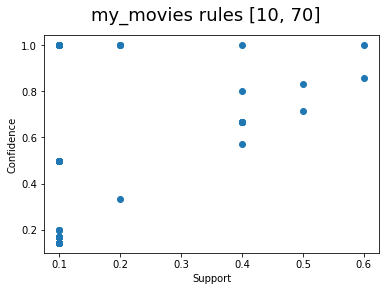

In [13]:
#visualization [10, 70]

plt.scatter(rules10_70['support'], rules10_70['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [10, 70]', size=18)

In [14]:
# 20% Support and 60% confidence

frequent_itemsets20_60 = apriori(df_movies2, min_support=0.2, use_colnames=True)
frequent_itemsets20_60

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [15]:
rules20_60 = association_rules(frequent_itemsets20_60, metric='lift', min_threshold=0.6)

# Lift Ratio > 1 is a good association rule
rules20_60[rules20_60.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
15,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


Text(0.5, 0.98, 'my_movies rules [20, 60]')

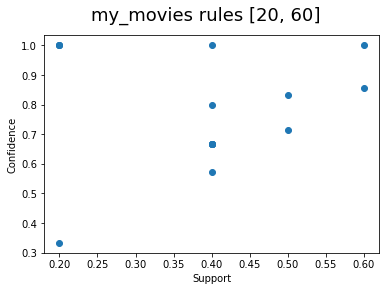

In [16]:
#visualization

plt.scatter(rules20_60['support'], rules20_60['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [20, 60]', size=18)

In [17]:
# 10% Support and 50% confidence

frequent_itemsets10_50 = apriori(df_movies2, min_support=0.1, use_colnames=True)
frequent_itemsets10_50

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [18]:
rules10_50 = association_rules(frequent_itemsets10_50, metric='lift', min_threshold=0.5)

# Lift Ratio > 1 is a good association rule
rules10_50[rules10_50.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
172,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
227,"(LOTR2, Green Mile, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
197,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
186,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
137,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
43,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
42,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0.98, 'my_movies rules [10, 50]')

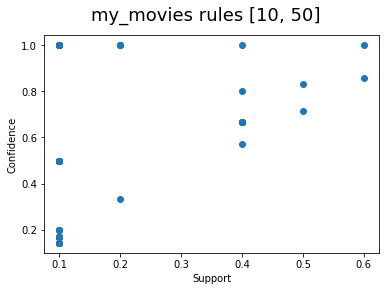

In [19]:
#visualization 10,50

plt.scatter(rules10_50['support'], rules10_50['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [10, 50]', size=18)

### change in K-Itemset/minimum length in apriori algorithm

In [21]:
# 10% Support and 50% confidence
# K itemset is 2

frequent_itemsets10_50 = apriori(df_movies2, min_support=0.1, use_colnames=True, max_len=2)
frequent_itemsets10_50

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [22]:
rules10_50 = association_rules(frequent_itemsets10_50, metric='lift', min_threshold=0.5)

# Lift Ratio > 1 is a good association rule
rules10_50[rules10_50.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
38,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
31,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
30,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
39,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
27,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
28,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
37,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
36,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


Text(0.5, 0.98, 'my_movies rules K=2 [10, 50]')

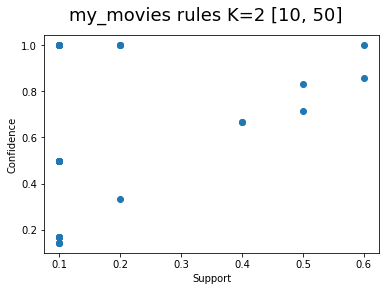

In [23]:
#visualization 10,50

plt.scatter(rules10_50['support'], rules10_50['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules K=2 [10, 50]', size=18)